<a href="https://colab.research.google.com/github/asadacce/ML-based-QSAR-against-GRK2/blob/main/GRK2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 516.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 3.5 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
target = new_client.target
target_query = target.search('GRK2')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Sus scrofa,Protein-serine/threonine kinase,17.0,False,CHEMBL3831327,"[{'accession': 'F1RUX3', 'component_descriptio...",SINGLE PROTEIN,9823
1,[],Mus musculus,Beta-adrenergic receptor kinase 1,14.0,False,CHEMBL3711486,"[{'accession': 'Q99MK8', 'component_descriptio...",SINGLE PROTEIN,10090
2,[],Bos taurus,Beta-adrenergic receptor kinase 1,14.0,False,CHEMBL3711550,"[{'accession': 'P21146', 'component_descriptio...",SINGLE PROTEIN,9913
3,[],Rattus norvegicus,Beta-adrenergic receptor kinase 1,14.0,False,CHEMBL4105719,"[{'accession': 'P26817', 'component_descriptio...",SINGLE PROTEIN,10116
4,"[{'xref_id': 'P25098', 'xref_name': None, 'xre...",Homo sapiens,G-protein coupled receptor kinase 2,13.0,False,CHEMBL4079,"[{'accession': 'P25098', 'component_descriptio...",SINGLE PROTEIN,9606


In [4]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL4079'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,269720,[],CHEMBL654962,Inhibition of Beta-adrenergic receptor kinase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,126.0
1,None,275781,[],CHEMBL654962,Inhibition of Beta-adrenergic receptor kinase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,557.0
2,None,302844,[],CHEMBL654962,Inhibition of Beta-adrenergic receptor kinase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,563.0
3,None,1232530,[],CHEMBL679594,Inhibition of G-protein coupled receptor kinas...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,1233673,[],CHEMBL679593,Inhibition of G-protein coupled receptor kinas...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,None,23150951,[],CHEMBL4810440,Inhibition of human GRK2 using casein as subst...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,nM,UO_0000065,None,10000.0
307,Not Active,23347082,[],CHEMBL4882609,Invitrogen kinase screen (GRK2),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,µM,None,None,0.59
308,None,23372655,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884620,BARK1 [GRK2(ADR1LGG5)] Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,pIC50,None,UO_0000065,None,6.0
309,None,23373064,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884911,BARK1 [GRK2(ADR1LGG5)] Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,pIC50,None,UO_0000065,None,6.0


In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,269720,[],CHEMBL654962,Inhibition of Beta-adrenergic receptor kinase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,126.0
1,None,275781,[],CHEMBL654962,Inhibition of Beta-adrenergic receptor kinase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,557.0
2,None,302844,[],CHEMBL654962,Inhibition of Beta-adrenergic receptor kinase 1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,563.0
3,None,1232530,[],CHEMBL679594,Inhibition of G-protein coupled receptor kinas...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,1233673,[],CHEMBL679593,Inhibition of G-protein coupled receptor kinas...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,None,23150951,[],CHEMBL4810440,Inhibition of human GRK2 using casein as subst...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,nM,UO_0000065,None,10000.0
307,Not Active,23347082,[],CHEMBL4882609,Invitrogen kinase screen (GRK2),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,IC50,µM,None,None,0.59
308,None,23372655,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884620,BARK1 [GRK2(ADR1LGG5)] Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,pIC50,None,UO_0000065,None,6.0
309,None,23373064,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4884911,BARK1 [GRK2(ADR1LGG5)] Takeda global kinase panel,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,G-protein coupled receptor kinase 2,9606,None,None,pIC50,None,UO_0000065,None,6.0


In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68409,COC(=O)c1ccc(/C=C/c2ccc([N+](=O)[O-])o2)o1,126000.0
1,CHEMBL307533,NC(=O)Cc1c(N)ncn1[C@@H]1O[C@H](CO)[C@@H](O)[C@...,557000.0
2,CHEMBL69467,CCC(=O)n1nc2c(c1C(C)(C)C)C(=O)c1ccccc1-2,563000.0
3,CHEMBL7572,CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)cc2c1,100000.0
4,CHEMBL7432,CN(C)CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)...,100000.0
...,...,...,...
306,CHEMBL4877302,CCc1cc(Nc2nc(NCc3ccc(Cl)cc3OC)nc3cccc(OC)c23)n...,10000.0
307,CHEMBL4538174,C[C@@H](NC(=O)Nc1cc2[nH]ncc2c(CO)n1)c1ccccc1,0.59
308,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0
309,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0


In [ ]:
df3['standard_value'] = pd.to_numeric(df3['standard_value'],errors = 'coerce')
df3

<ipython-input-8-8d728a6a6ac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['standard_value'] = pd.to_numeric(df3['standard_value'],errors = 'coerce')


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68409,COC(=O)c1ccc(/C=C/c2ccc([N+](=O)[O-])o2)o1,126000.00
1,CHEMBL307533,NC(=O)Cc1c(N)ncn1[C@@H]1O[C@H](CO)[C@@H](O)[C@...,557000.00
2,CHEMBL69467,CCC(=O)n1nc2c(c1C(C)(C)C)C(=O)c1ccccc1-2,563000.00
3,CHEMBL7572,CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)cc2c1,100000.00
4,CHEMBL7432,CN(C)CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)...,100000.00
...,...,...,...
306,CHEMBL4877302,CCc1cc(Nc2nc(NCc3ccc(Cl)cc3OC)nc3cccc(OC)c23)n...,10000.00
307,CHEMBL4538174,C[C@@H](NC(=O)Nc1cc2[nH]ncc2c(CO)n1)c1ccccc1,0.59
308,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00
309,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
-np.log10( (10**-9)* 100000000 )
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df3)
df_norm

<ipython-input-11-5b44499df3ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['standard_value_norm'] = norm
<ipython-input-11-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,standard_value_norm
0,CHEMBL68409,COC(=O)c1ccc(/C=C/c2ccc([N+](=O)[O-])o2)o1,126000.00
1,CHEMBL307533,NC(=O)Cc1c(N)ncn1[C@@H]1O[C@H](CO)[C@@H](O)[C@...,557000.00
2,CHEMBL69467,CCC(=O)n1nc2c(c1C(C)(C)C)C(=O)c1ccccc1-2,563000.00
3,CHEMBL7572,CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)cc2c1,100000.00
4,CHEMBL7432,CN(C)CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)...,100000.00
...,...,...,...
306,CHEMBL4877302,CCc1cc(Nc2nc(NCc3ccc(Cl)cc3OC)nc3cccc(OC)c23)n...,10000.00
307,CHEMBL4538174,C[C@@H](NC(=O)Nc1cc2[nH]ncc2c(CO)n1)c1ccccc1,0.59
308,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00
309,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00


In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-9-715877a2f74e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL68409,COC(=O)c1ccc(/C=C/c2ccc([N+](=O)[O-])o2)o1,3.899629
1,CHEMBL307533,NC(=O)Cc1c(N)ncn1[C@@H]1O[C@H](CO)[C@@H](O)[C@...,3.254145
2,CHEMBL69467,CCC(=O)n1nc2c(c1C(C)(C)C)C(=O)c1ccccc1-2,3.249492
3,CHEMBL7572,CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)cc2c1,4.000000
4,CHEMBL7432,CN(C)CC(=O)Oc1ccc2[nH]c(C(=O)c3cc4ccccc4[nH]3)...,4.000000
...,...,...,...
306,CHEMBL4877302,CCc1cc(Nc2nc(NCc3ccc(Cl)cc3OC)nc3cccc(OC)c23)n...,5.000000
307,CHEMBL4538174,C[C@@H](NC(=O)Nc1cc2[nH]ncc2c(CO)n1)c1ccccc1,9.229148
308,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,6.000000
309,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,6.000000


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-04 13:50:00--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-04 13:50:00--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2023-03-04 13:50:01 (201 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-04 13:50:01--  https://gi

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
! bash padel.sh

Processing CHEMBL68409 in molecule.smi (1/311). 
Processing CHEMBL307533 in molecule.smi (2/311). 
Processing CHEMBL7572 in molecule.smi (4/311). Average speed: 1.89 s/mol.
Processing CHEMBL69467 in molecule.smi (3/311). Average speed: 3.41 s/mol.
Processing CHEMBL7432 in molecule.smi (5/311). Average speed: 1.51 s/mol.
Processing CHEMBL7600 in molecule.smi (6/311). Average speed: 1.22 s/mol.
Processing CHEMBL60254 in molecule.smi (7/311). Average speed: 1.07 s/mol.
Processing CHEMBL2435840 in molecule.smi (8/311). Average speed: 0.98 s/mol.
Processing CHEMBL3093257 in molecule.smi (9/311). Average speed: 0.99 s/mol.
Processing CHEMBL2079349 in molecule.smi (10/311). Average speed: 0.91 s/mol.
Processing CHEMBL2079395 in molecule.smi (11/311). Average speed: 0.89 s/mol.
Processing CHEMBL3093256 in molecule.smi (12/311). Average speed: 0.84 s/mol.
Processing CHEMBL3093255 in molecule.smi (13/311). Average speed: 0.79 s/mol.
Processing CHEMBL2079205 in molecule.smi (14/311). Average spee

In [ ]:
import pandas as pd
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL307533,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL68409,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL69467,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL7572,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL7432,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,CHEMBL4877302,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,CHEMBL4538174,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,CHEMBL4088216,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,CHEMBL4549667,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df3_X.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
308,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
309,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df_norm['pIC50']
Y

0      3.899629
1      3.254145
2      3.249492
3      4.000000
4      4.000000
         ...   
306    5.000000
307    9.229148
308    6.000000
309    6.000000
310    6.000000
Name: pIC50, Length: 311, dtype: float64

In [ ]:
df4 = pd.concat([X,Y], axis=1)
df4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.899629
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.254145
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.249492
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
307,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.229148
308,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
309,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [ ]:
df4 = df4.dropna(how='any')
df4

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.899629
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.254145
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.249492
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
307,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.229148
308,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
309,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [ ]:
X = df4.drop('pIC50', axis=1)
Y = df4.pIC50

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP37,PubchemFP150,PubchemFP152,PubchemFP153,...,PubchemFP742,PubchemFP758,PubchemFP763,PubchemFP784,PubchemFP791,PubchemFP797,PubchemFP800,PubchemFP805,PubchemFP821,PubchemFP826
0,1,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,0,0,0,0,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,1,0
307,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
309,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X-test.csv', index=False)

In [ ]:
import numpy as np
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
#train_r2
score = model.score(X_train, Y_train)
score

0.8978211846007306

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, Y_train_pred)

0.170223113363843

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
score = model.score(X_test, Y_test)
score

0.67304462044102

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred)

0.43217593626013173

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.15108721209107911
0.9045045082010659


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = RandomForestRegressor()
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

0.7369832247291889


Text(0.5, 0, 'Predicted pIC50')

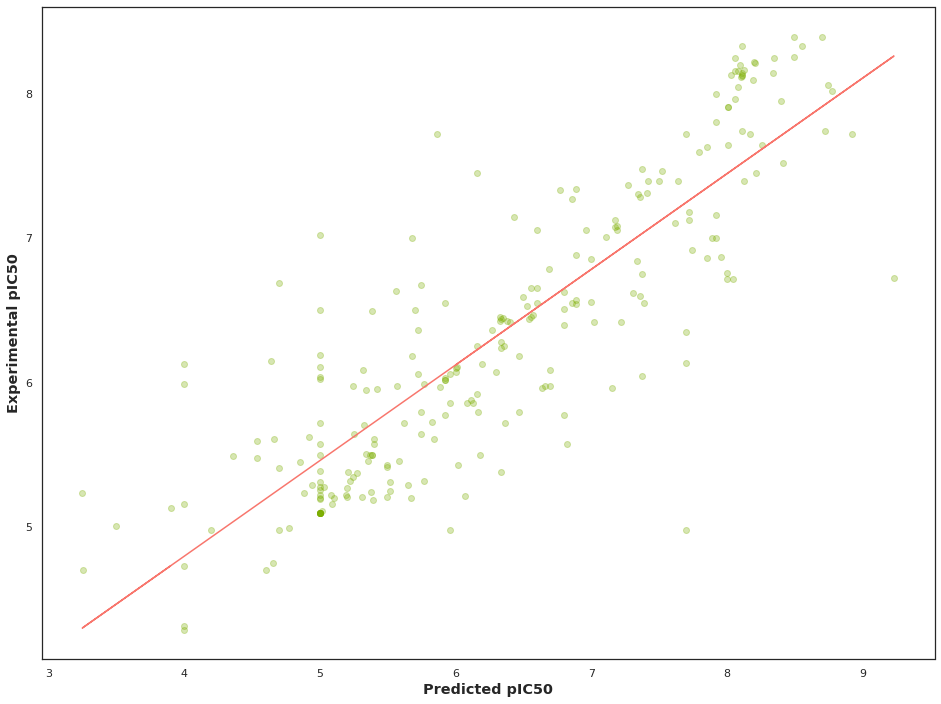

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,12))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Experimental pIC50', fontsize='large', fontweight='bold')
plt.xlabel('Predicted pIC50', fontsize='large', fontweight='bold')

# SVR

In [ ]:
import numpy as np
from sklearn.svm import SVR
model2=SVR()
model2.fit(X_train, Y_train)

SVR()

In [ ]:
Y_train_pred2 = model2.predict(X_train)
Y_test_pred2 = model2.predict(X_test)

In [ ]:
#train_r2
score = model2.score(X_train, Y_train)
score

0.72436373180228

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, Y_train_pred2)

0.459191697860911

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred2)

0.7053068921493721

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred2)

0.3895310423292134

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model2, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.41119098869280124
0.74047216764263


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = SVR()
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

0.24500476969726276


Text(0.5, 0, 'Predicted pIC50')

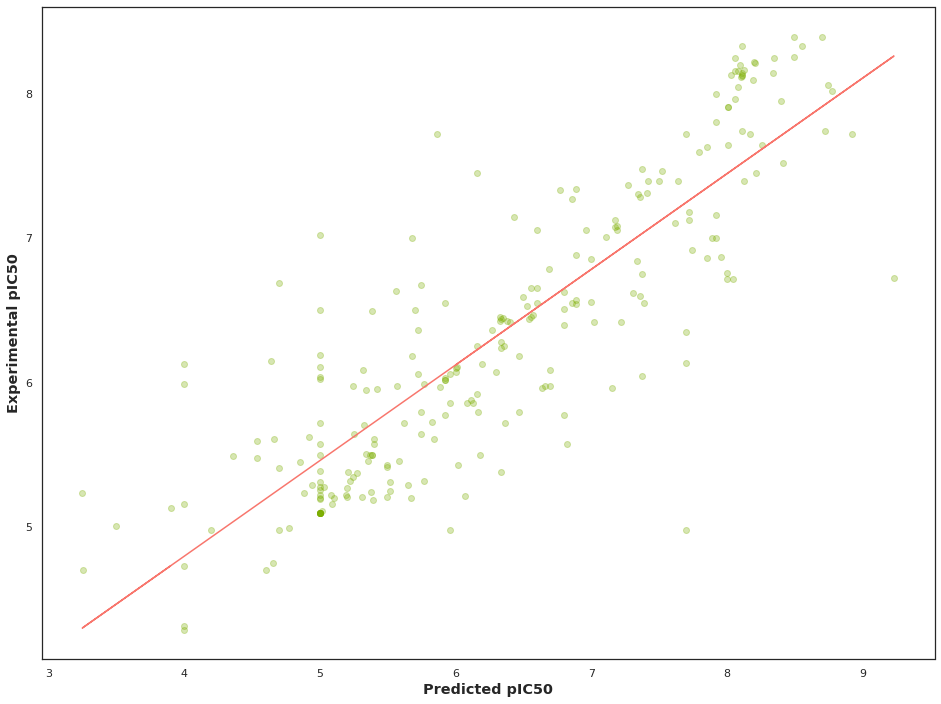

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,12))
plt.scatter(x=Y_train, y=Y_train_pred2, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred2, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Experimental pIC50', fontsize='large', fontweight='bold')
plt.xlabel('Predicted pIC50', fontsize='large', fontweight='bold')

# Decision Tree

In [ ]:
X = df4.drop('pIC50', axis=1)
Y = df4.pIC50

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
import numpy as np
from sklearn import tree
model3 = tree.DecisionTreeRegressor()
model3.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
Y_train_pred3 = model3.predict(X_train)
Y_test_pred3 = model3.predict(X_test)

In [ ]:
#train_r2
score = model3.score(X_train, Y_train)
score

0.9461775460444326

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, Y_train_pred3)

0.08389207349727644

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred3)

0.4775951992501306

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred3)

0.9233452355855227

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model3, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.08482888873446033
0.9462636587351267


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = tree.DecisionTreeRegressor()
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

0.8295805799979009


Text(0.5, 0, 'Predicted pIC50')

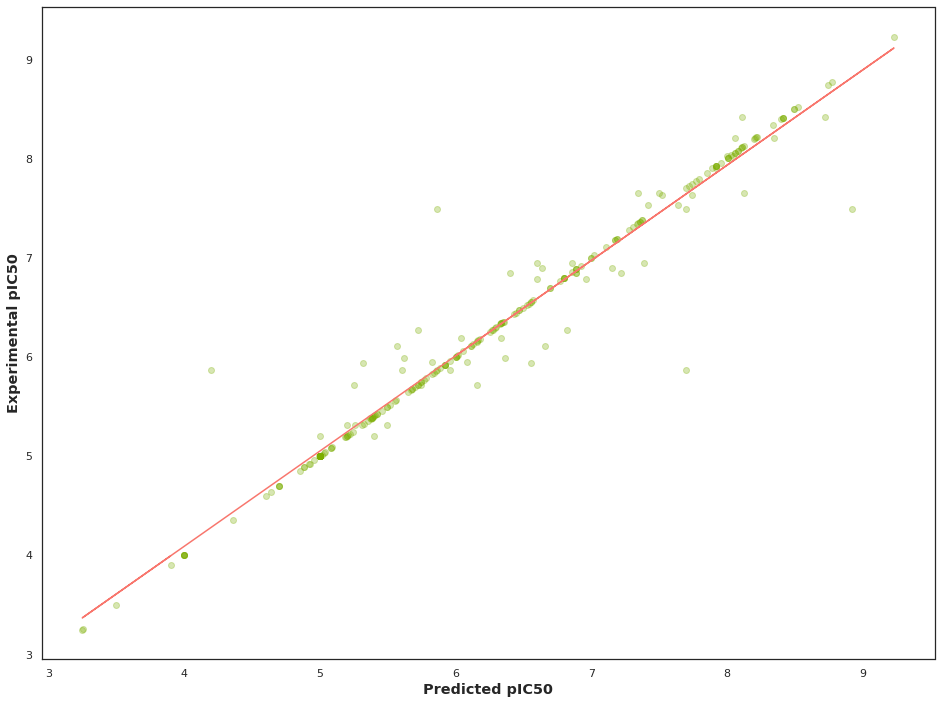

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,12))
plt.scatter(x=Y_train, y=Y_train_pred3, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred3, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Experimental pIC50', fontsize='large', fontweight='bold')
plt.xlabel('Predicted pIC50', fontsize='large', fontweight='bold')

# K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor(n_neighbors=2)
model4.fit(X, Y)
r2 = model4.score(X_test, Y_test)
r2

0.7436209643317092

In [ ]:
#train_r2
score = model4.score(X_train, Y_train)
score

0.79701553589243

In [ ]:
Y_train_pred4 = model4.predict(X_train)
Y_test_pred4 = model4.predict(X_test)

In [ ]:
#train_mse
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_train, Y_train_pred4)

0.32259375531771883

In [ ]:
#test_q2/external
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_pred4)

0.7436209643317092

In [ ]:
#test_mse/external
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_test_pred4)

0.39929254900198596

In [ ]:
#10_fold_CV
import statistics
from sklearn.model_selection import cross_validate
scores = cross_validate(model4, X, Y, cv=10,
                     scoring=('r2', 'neg_mean_squared_error'),
                     return_train_score=True)
B=(scores['train_neg_mean_squared_error'])
B1 = statistics.mean(B)
print(B1)

C=(scores['train_r2'])
C1 = statistics.mean(C)
print(C1)

-0.3311280237560648
0.7907049003112212


In [ ]:
#y_scrambiling
import statistics
r2_train_list = []
for i in range(100):
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  model = KNeighborsRegressor(n_neighbors=2)
  model.fit(X_train, Y_train1)
  Y_train_pred = model.predict(X_train)
  r2b = r2_score(Y_train, Y_train_pred)
  r2_train_list.append(r2b)

A=(r2_train_list[:100])
A1 = statistics.mean(A)
print(A1)

-0.5079206448290821


Text(0.5, 0, 'Predicted pIC50')

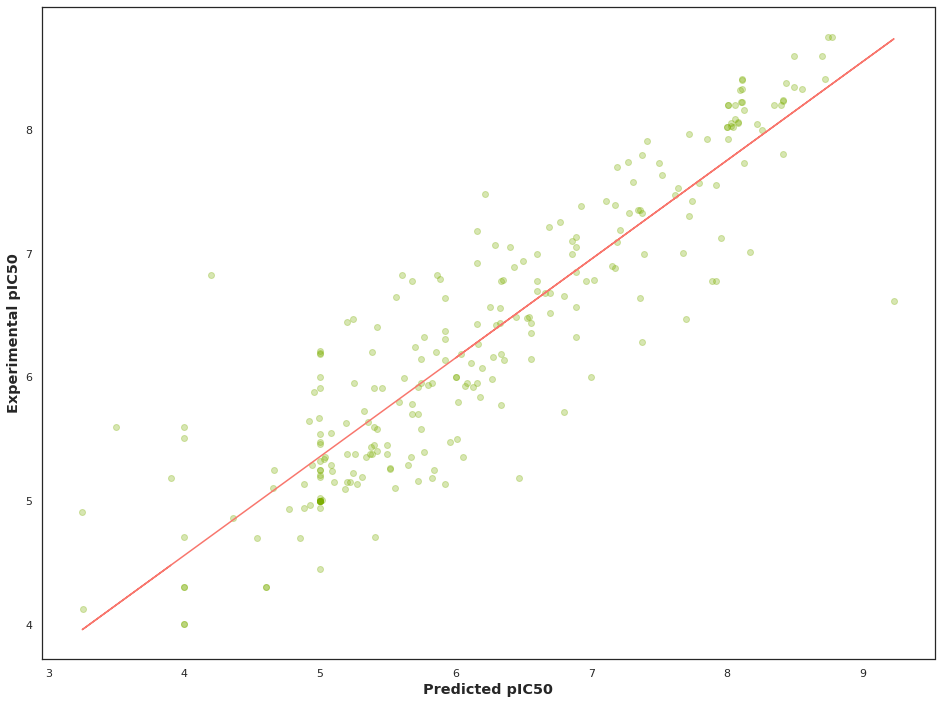

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,12))
plt.scatter(x=Y_train, y=Y_train_pred4, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred4, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Experimental pIC50', fontsize='large', fontweight='bold')
plt.xlabel('Predicted pIC50', fontsize='large', fontweight='bold')

In [ ]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

,id,scaffolds,name,formula,SMILES,ChEMBL_id,ZINC_id,PubChem_id,DrugBank_id,CAS_no,references,classifications,molecular_mass,ID,ROMol
0,101,"['c1ccccc1', 'c1ccc(C2CCc3ccccc3O2)cc1']",Epicatechin,C15H14O6,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2,CHEMBL583912,ZINC00119988,72276,,490-46-0,[{'journal': {'name': 'South African Journal o...,"[{'classification': 'Flavonoids', 'id': 776}, ...",290.27,SANC00101_minRM1.pdb,
1,102,"['C1=C2CCCCC2C2CCC3CCCC3C2C1', 'C1=CCCCC1', 'C...",Beta-Sitosterol,C29H50O,CC[C@H](CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C...,CHEMBL221542,ZINC04095717,222284,,83-46-5,[{'journal': {'name': 'South African Journal o...,"[{'classification': 'Phytosterol', 'id': 808},...",414.7,SANC00102_minRM1.pdb,
2,103,"['c1ccccc1', 'c1ccc(C2CCc3ccccc3O2)cc1']",Epigallocatechin,C15H14O7,Oc1cc(O)c2c(c1)O[C@H](c1cc(O)c(O)c(O)c1)[C@H](...,CHEMBL130415,ZINC03870339,10425234,DB03823,970-74-1,[{'journal': {'name': 'South African Journal o...,"[{'classification': 'Flavonoids', 'id': 776}, ...",306.27,SANC00103_minRM1.pdb,
3,104,"['c1ccccc1', 'O=C(C=Cc1ccccc1)c1ccccc1', 'C(=C...",Cardamonin,C16H14O4,COc1cc(O)cc(O)c1C(=O)/C=C/c1ccccc1,CHEMBL378104,ZINC04716487,641785,,19309-14-9,[{'journal': {'name': 'South African Journal o...,"[{'classification': 'Chalcone', 'id': 760}, {'...",270.28,SANC00104_minRM1.pdb,
4,105,"['c1ccccc1', 'O=C1CC(c2ccccc2)Oc2ccccc21', 'c1...",Pinocembrin,C15H12O4,O=C1C[C@H](c2ccccc2)Oc2cc(O)cc(O)c21,CHEMBL399910,ZINC00073693,238782,,480-39-7,[{'journal': {'name': 'South African Journal o...,"[{'classification': 'Flavonoids', 'id': 776}, ...",256.25,SANC00105_minRM1.pdb,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1130,"['C=C1C(=O)OC2C1CCC(=C)C1CCC(=C)C12', 'O=C1CCC...",dehydrocostus lactone,C15H18O2,C=C1CC[C@H]2C(=C)CC[C@@H]3C(=C)C(=O)O[C@@H]3[C...,,,,,477-43-0,[{'journal': {'name': 'Natural Product Researc...,[{'classification': 'Phenol lipids (Classyfire...,230.302,SANC01130_minRM1.pdb,
1008,1131,"['c1ccccc1', 'O=c1cc(-c2ccccc2)oc2ccccc12', 'O...",Nepetin,C16H12O7,COc1c(O)cc2oc(-c3ccc(O)c(O)c3)cc(=O)c2c1O,,,,,520-11-6,[{'journal': {'name': 'Natural Product Researc...,"[{'classification': 'Flavonoids (Classyfire)',...",316.262,SANC01131_minRM1.pdb,
1009,1132,"['C1=C2C3CCCCC3CCC2C2CCC3CCCCC3C2C1', 'C1=CCCC...",Oleanolic acid,C30H48O3,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,,,,,,[{'journal': {'name': 'African Journal of Trad...,[{'classification': 'Phenol lipids (Classyfire...,456.7,SANC01132_minRM1.pdb,
1010,1133,['C1CCNC1'],4-hydroxyhygric acid,C6H11NO3,CN1C[C@H](O)C[C@@H]1C(=O)O,,,,,67463-44-9,[{'journal': {'name': 'Tropical Journal of Pha...,[{'classification': 'Carboxylic acids and deri...,145.156,SANC01133_minRM1.pdb,

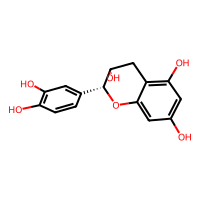
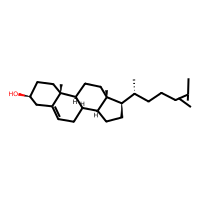
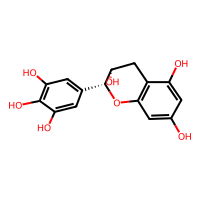
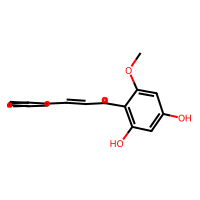
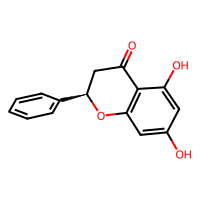
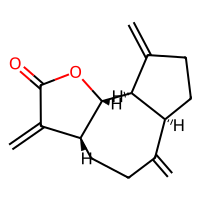
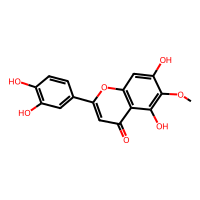
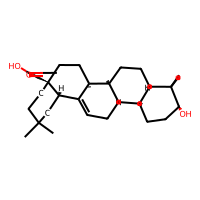
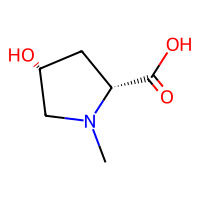
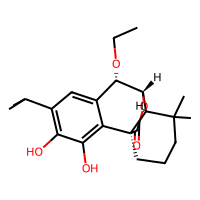

In [ ]:
from rdkit.Chem.PandasTools import LoadSDF
df = LoadSDF('SANCDB_all.sdf', smilesName='SMILES')
df

In [ ]:
from rdkit.Chem.PandasTools import LoadSDF
df = LoadSDF('SANCDB_all.sdf', smilesName='SMILES')

In [ ]:
selection = ['id','SMILES',]
df2 = df[selection]
df2

,id,SMILES
0,101,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)C2
1,102,CC[C@H](CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C...
2,103,Oc1cc(O)c2c(c1)O[C@H](c1cc(O)c(O)c(O)c1)[C@H](...
3,104,COc1cc(O)cc(O)c1C(=O)/C=C/c1ccccc1
4,105,O=C1C[C@H](c2ccccc2)Oc2cc(O)cc(O)c21
...,...,...
1007,1130,C=C1CC[C@H]2C(=C)CC[C@@H]3C(=C)C(=O)O[C@@H]3[C...
1008,1131,COc1c(O)cc2oc(-c3ccc(O)c(O)c3)cc(=O)c2c1O
1009,1132,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...
1010,1133,CN1C[C@H](O)C[C@@H]1C(=O)O


In [ ]:
! bash padel.sh

Processing SANC00101_minRM1.pdb in SANCDB_all.sdf (1/1012). 
Processing SANC00102_minRM1.pdb in SANCDB_all.sdf (2/1012). 
Processing SANC00103_minRM1.pdb in SANCDB_all.sdf (3/1012). Average speed: 3.53 s/mol.
Processing SANC00104_minRM1.pdb in SANCDB_all.sdf (4/1012). Average speed: 2.02 s/mol.
Processing SANC00105_minRM1.pdb in SANCDB_all.sdf (5/1012). Average speed: 1.49 s/mol.
Processing SANC00106_minRM1.pdb in SANCDB_all.sdf (6/1012). Average speed: 1.12 s/mol.
Processing SANC00107_minRM1.pdb in SANCDB_all.sdf (7/1012). Average speed: 0.96 s/mol.
Processing SANC00108_minRM1.pdb in SANCDB_all.sdf (8/1012). Average speed: 0.83 s/mol.
Processing SANC00109_minRM1.pdb in SANCDB_all.sdf (9/1012). Average speed: 0.74 s/mol.
Processing SANC00110_minRM1.pdb in SANCDB_all.sdf (10/1012). Average speed: 0.67 s/mol.
Processing SANC00111_minRM1.pdb in SANCDB_all.sdf (11/1012). Average speed: 0.61 s/mol.
Processing SANC00112_minRM1.pdb in SANCDB_all.sdf (12/1012). Average speed: 0.57 s/mol.
Proce

In [ ]:
import pandas as pd
des_X = pd.read_csv('descriptors_output.csv')
des_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,SANC00101_minRM1.pdb,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SANC00103_minRM1.pdb,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SANC00104_minRM1.pdb,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SANC00102_minRM1.pdb,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SANC00106_minRM1.pdb,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,SANC01131_minRM1.pdb,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,SANC01129_minRM1.pdb,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009,SANC01133_minRM1.pdb,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,SANC01134_minRM1.pdb,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Sanc = des_X.drop(columns=['Name'])
Sanc

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Sanc = Sanc.dropna(how='any')
Sanc

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.1)
sel.fit(X)

VarianceThreshold(threshold=0.1)

In [ ]:
Sanc=sel.transform(Sanc)

In [ ]:
pred_Sanc = model.predict(Sanc)
pred_Sanc

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.45698493, 4.31828745, 4.36380159, 4.31116691, 4.35167592,
       4.31160961, 4.06466857, 4.597304  , 4.06688728, 4.06688728,
       4.06466857, 4.05628353, 4.09353167, 4.09353167, 4.09353167,
       4.05406482, 4.05406482, 4.20735548, 4.85544514, 4.84192748,
       4.89732422, 4.89732422, 4.85544514, 5.14926498, 5.03836585,
       5.13822681, 4.1760742 , 5.17636216, 5.12236729, 5.4086477 ,
       4.72726412, 5.30755373, 5.40009793, 5.0491549 , 4.80185593,
       5.09325192, 4.88332892, 5.16463522, 5.20522733, 4.72726412,
       4.92252339, 5.24438999, 4.91996659, 4.92252339, 4.91996659,
       4.22284811, 4.31724531, 4.13270976, 4.21764952, 4.34596829,
       4.19629466, 4.19512646, 4.33194236, 4.33194236, 4.21764952,
       4.13270976, 4.21764952, 4.3026133 , 4.37455925, 4.37905083,
       4.11384296, 4.37731988, 4.11384296, 4.17729456, 4.14654967,
       4.19016112, 4.33440129, 4.31116691, 4.33194236, 4.34842722,
       4.33194236, 4.34596829, 4.34596829, 4.57275511, 4.15125

In [ ]:
pred_Sanc = pd.DataFrame (pred_Sanc)
pred_Sanc

,0
0,4.456985
1,4.318287
2,4.363802
3,4.311167
4,4.351676
...,...
993,4.404589
994,4.386320
995,4.358741
996,4.519088


In [ ]:
pred_Sanc.to_csv('Sanc_predicted.csv')